In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
# Download S&P 500 data from Wikipedia
sp500_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_df = sp500_data[0]

# Get symbols and names
symbols = sp500_df['Symbol'].tolist()


In [2]:
sector_df=sp500_df.rename(columns={'GICS Sector': 'Sector','GICS Sub-Industry': 'Sub-Industry'})

In [3]:
sector_df

,Symbol,Security,Sector,Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
sector_df['Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

In [5]:
start = "2023-01-01"
end = "2023-12-31"

df_prices = yf.download(symbols,start=start,end=end)['Adj Close']


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-12-31)')
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [6]:
assets_to_drop = ["BF.B", "BRK.B"]
df_prices.drop(columns=assets_to_drop, inplace=True, errors='ignore')

In [7]:
# Remove dropped assets from the list
symbols = [symbol for symbol in symbols if symbol not in assets_to_drop]

In [8]:
sector_df.loc[sector_df['Symbol'] == 'MMM', 'Sector'].iloc[0]

'Industrials'

In [9]:
earnings = []
for a in symbols:
    initial = df_prices[a][0]
    final = df_prices[a][-1]
    earning = (final - initial) / initial * 100
    sector= sector_df.loc[sector_df['Symbol'] == a, 'Sector'].iloc[0]
    security = sector_df.loc[sector_df['Symbol'] == a, 'Security'].iloc[0]
    earnings.append((a,security,sector, initial,final, earning))

# Convert the earnings list to a DataFrame for easier manipulation and visualization
earnings_df = pd.DataFrame(earnings, columns=['Asset','Security','Sector','Initial price','Final price', 'Earnings %'])
earnings_df=earnings_df.sort_values(by='Asset')
print(earnings_df)

    Asset                 Security                  Sector  Initial price  \
9       A     Agilent Technologies             Health Care     148.957687   
25    AAL  American Airlines Group             Industrials      12.740000   
39   AAPL               Apple Inc.  Information Technology     124.216301   
3    ABBV                   AbbVie             Health Care     154.597809   
11   ABNB                   Airbnb  Consumer Discretionary      84.900002   
..    ...                      ...                     ...            ...   
496   YUM              Yum! Brands  Consumer Discretionary     123.994751   
498   ZBH            Zimmer Biomet             Health Care     126.299927   
497  ZBRA       Zebra Technologies  Information Technology     260.200012   
499  ZION     Zions Bancorporation              Financials      45.668644   
500   ZTS                   Zoetis             Health Care     145.193268   

     Final price  Earnings %  
9     139.029999   -6.664771  
25     13.740

In [10]:
earnings_df

,Asset,Security,Sector,Initial price,Final price,Earnings %
9,A,Agilent Technologies,Health Care,148.957687,139.029999,-6.664771
25,AAL,American Airlines Group,Industrials,12.740000,13.740000,7.849294
39,AAPL,Apple Inc.,Information Technology,124.216301,192.284637,54.798232
3,ABBV,AbbVie,Health Care,154.597809,153.503372,-0.707925
11,ABNB,Airbnb,Consumer Discretionary,84.900002,136.139999,60.353353
...,...,...,...,...,...,...
496,YUM,Yum! Brands,Consumer Discretionary,123.994751,130.009369,4.850704
498,ZBH,Zimmer Biomet,Health Care,126.299927,121.699997,-3.642068
497,ZBRA,Zebra Technologies,Information Technology,260.200012,273.329987,5.046108
499,ZION,Zions Bancorporation,Financials,45.668644,43.412785,-4.939624


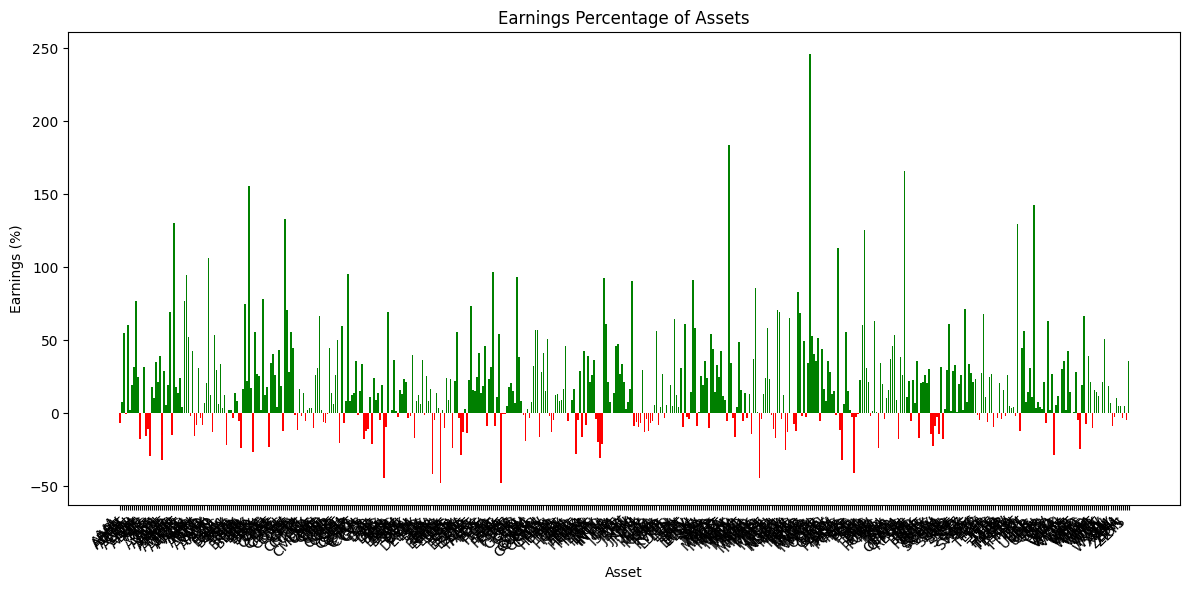

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(earnings_df['Asset'], earnings_df['Earnings %'], color=['red' if earning < 0 else 'green' for earning in earnings_df['Earnings %']])
plt.xlabel('Asset')
plt.ylabel('Earnings (%)')
plt.title('Earnings Percentage of Assets')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

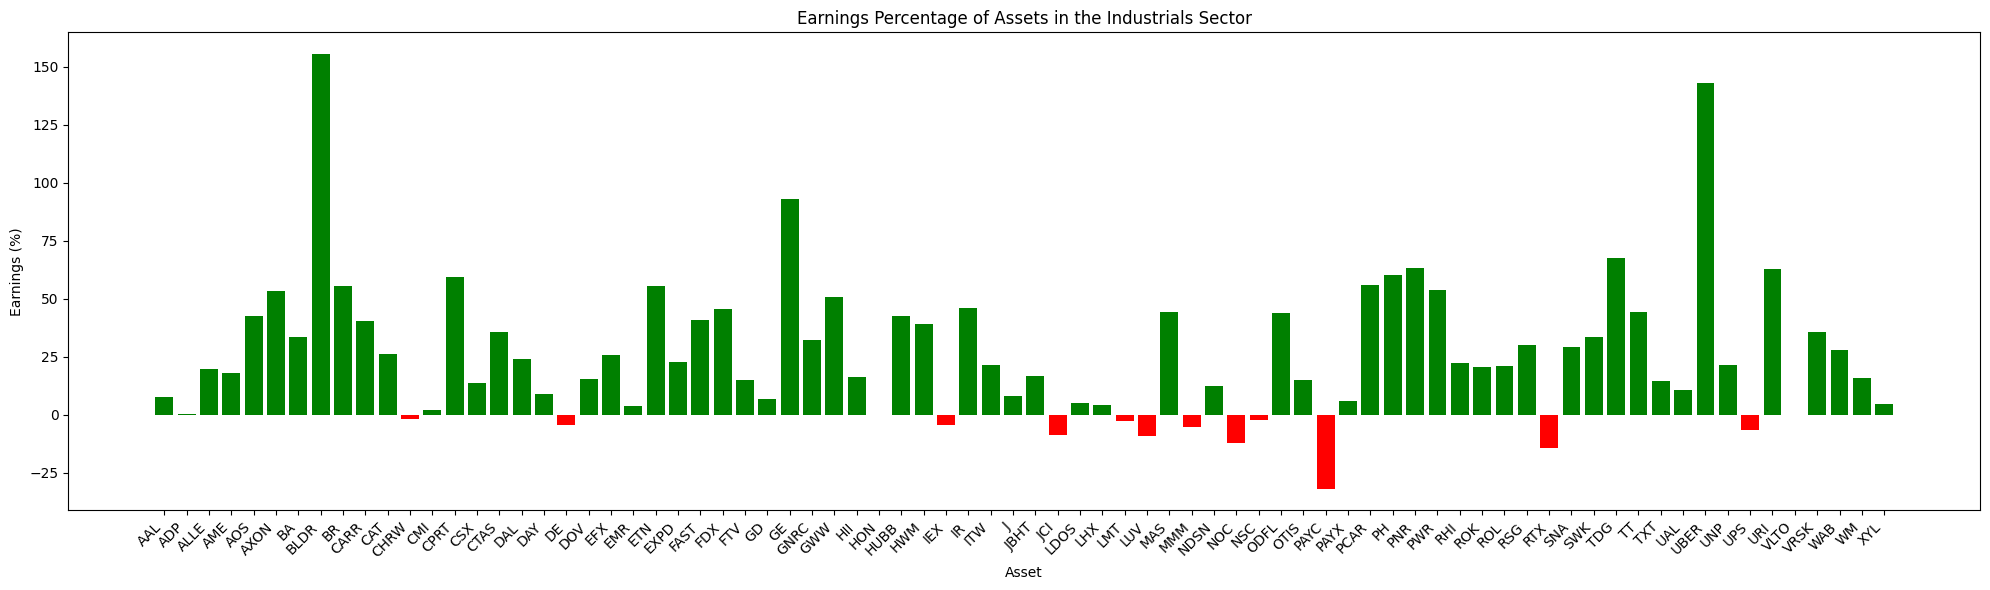

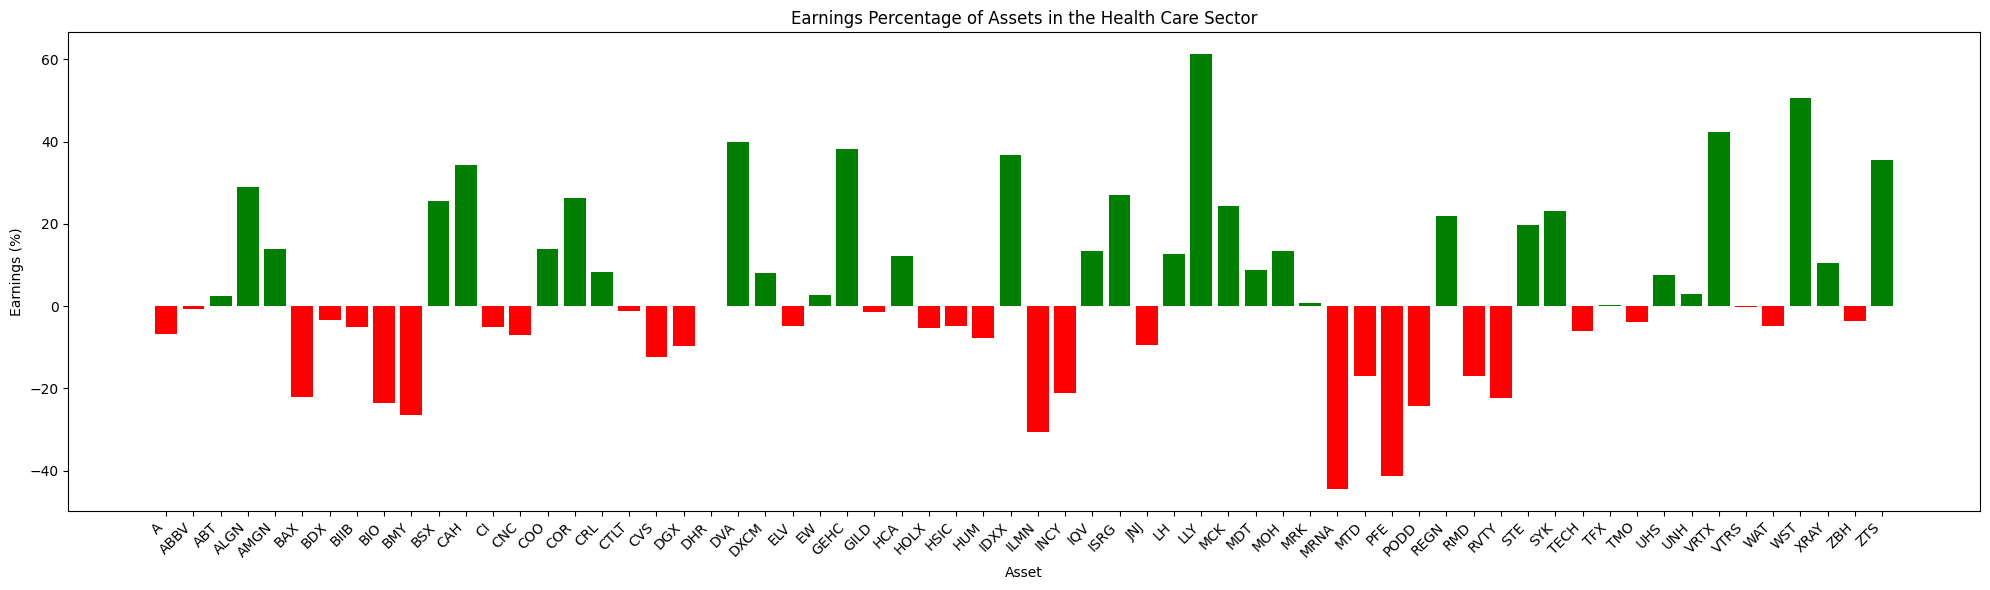

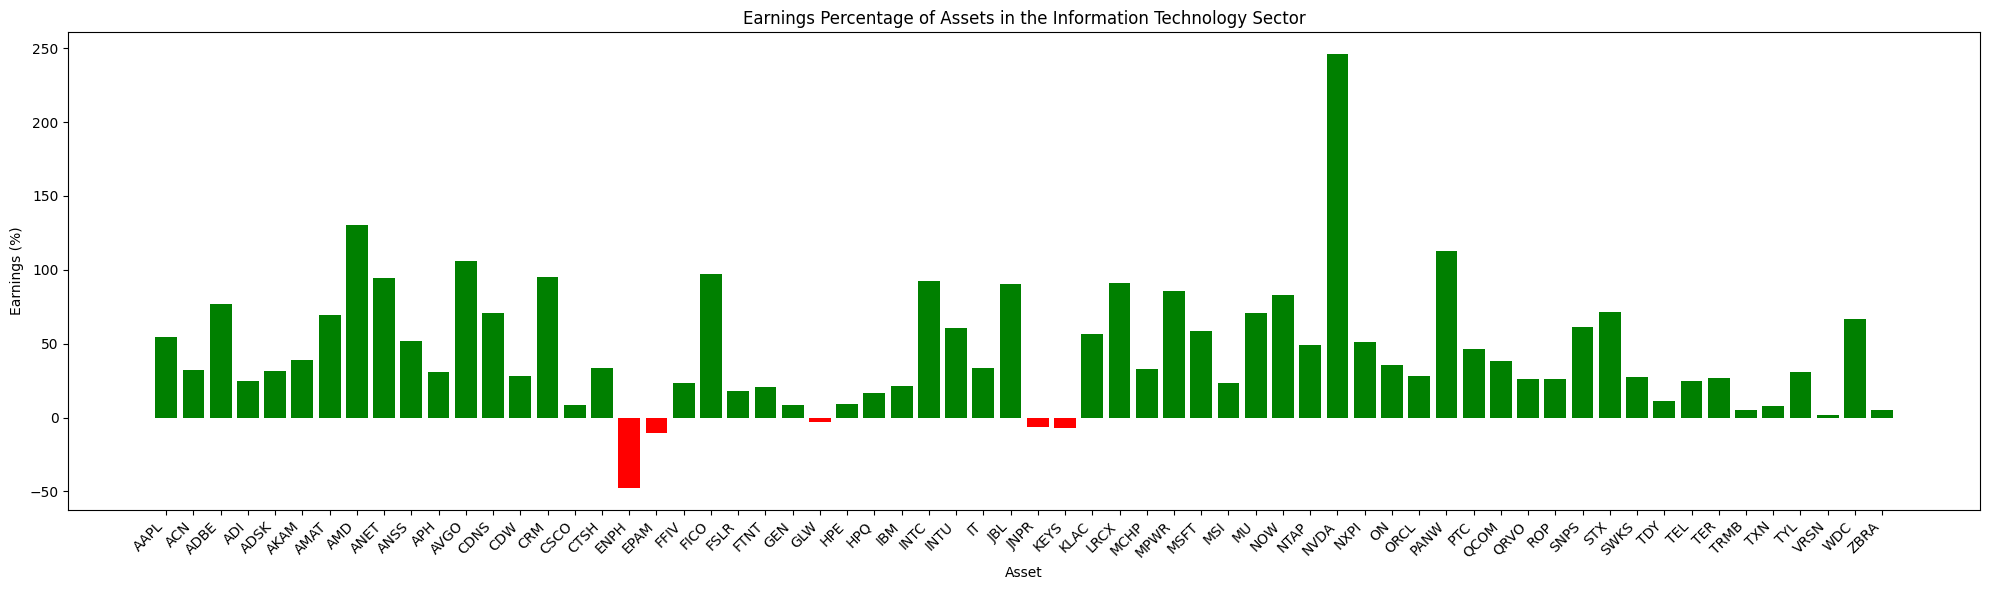

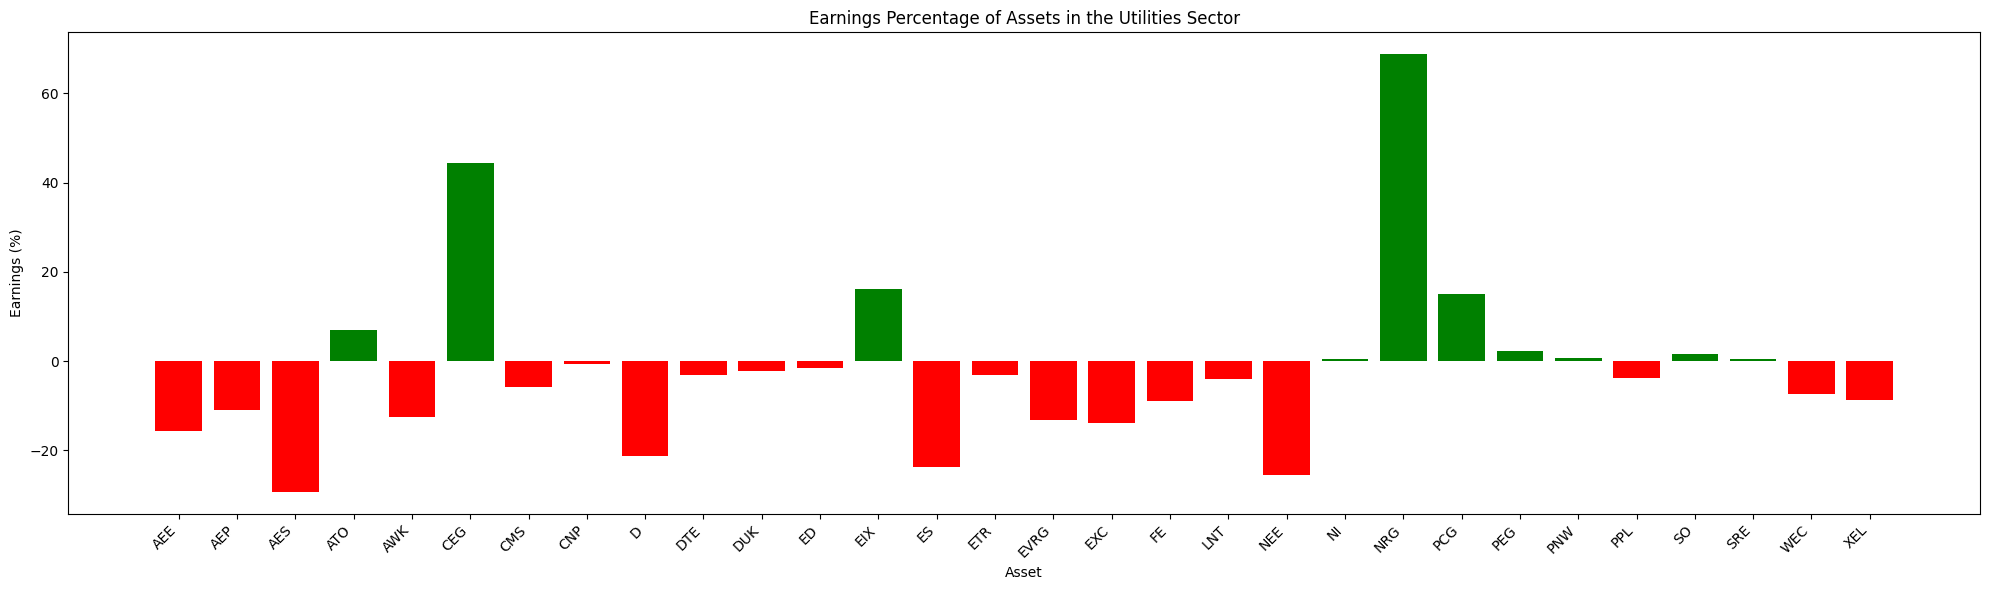

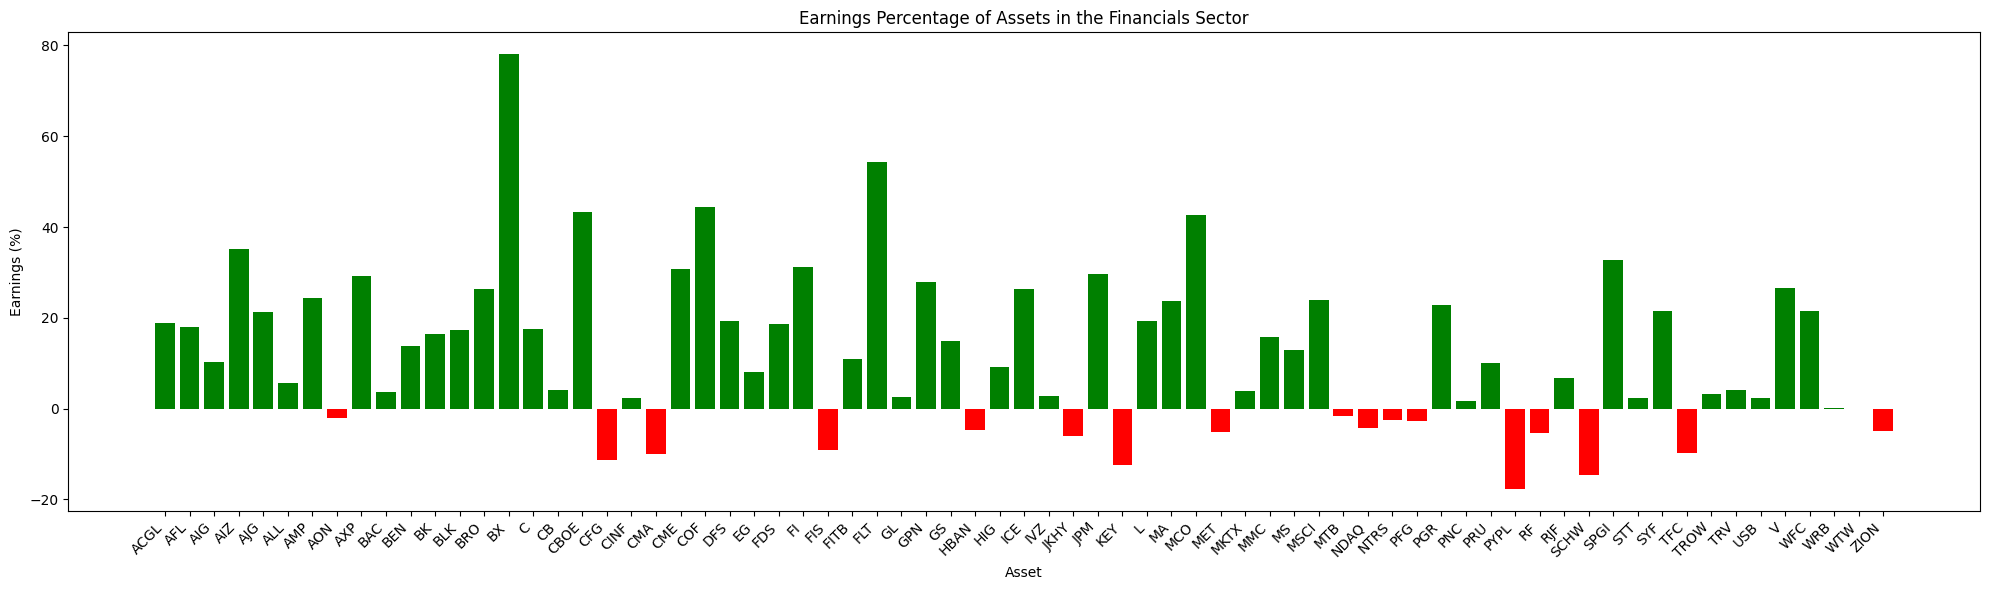

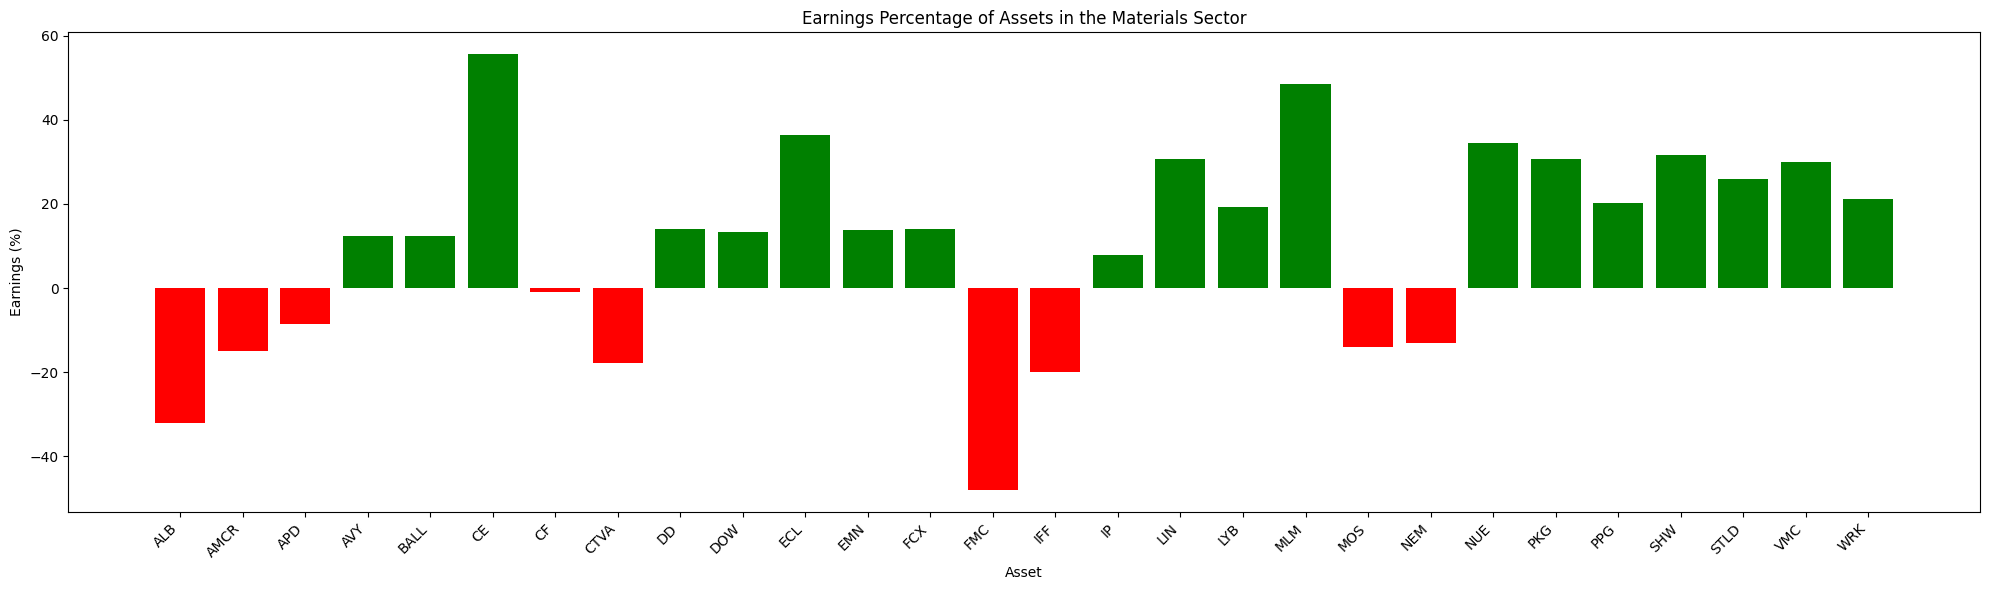

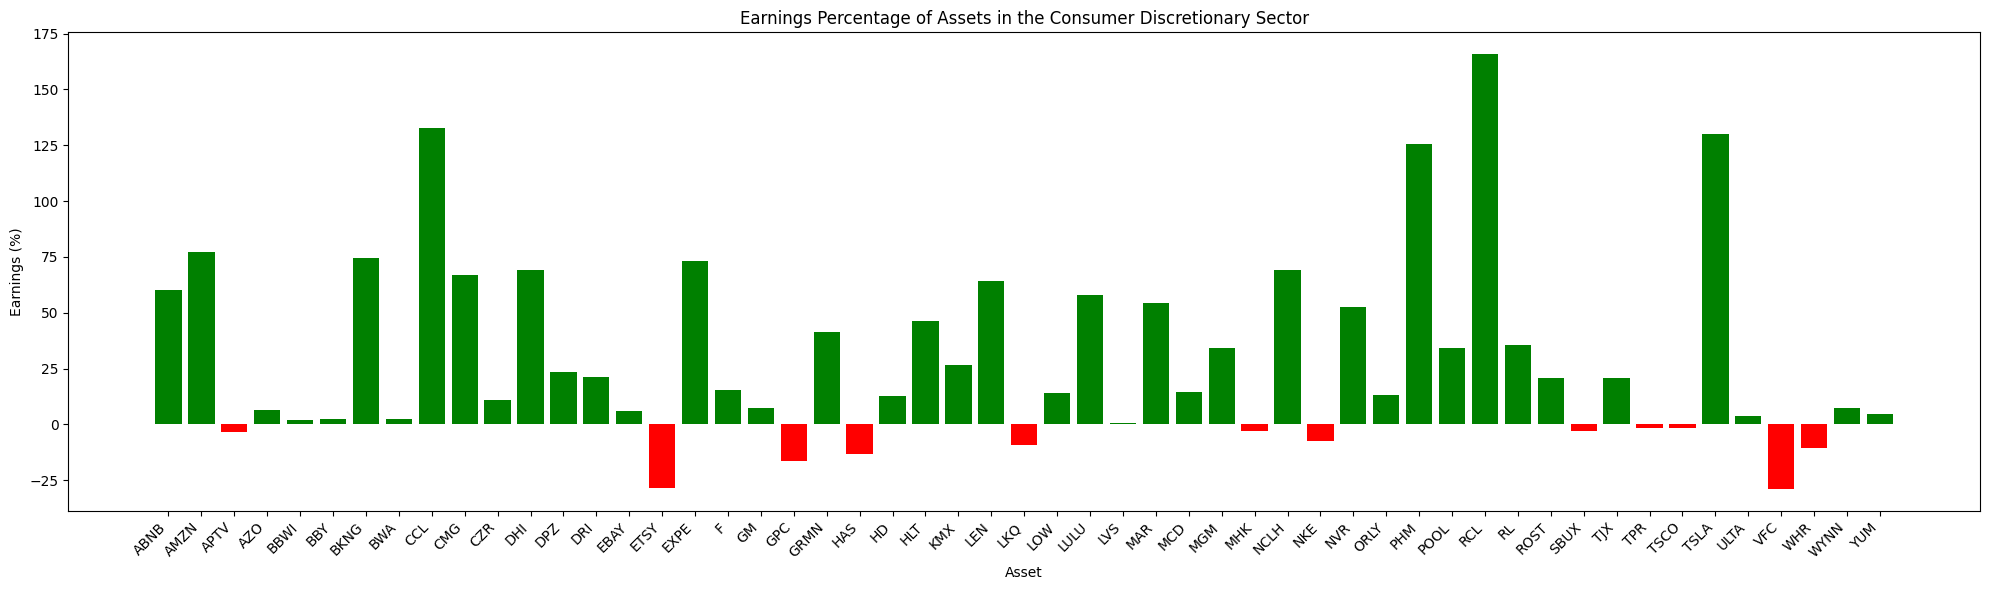

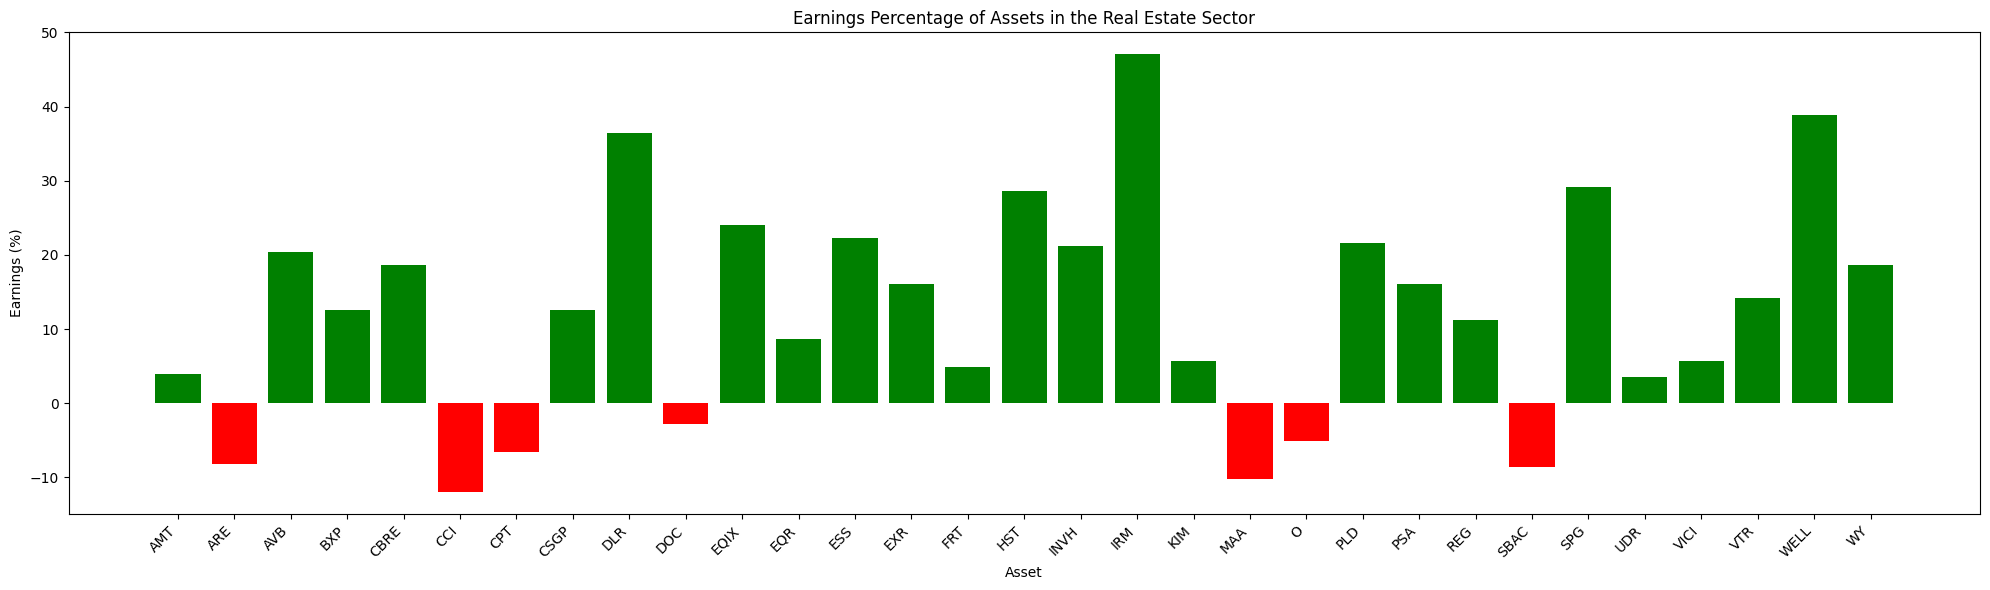

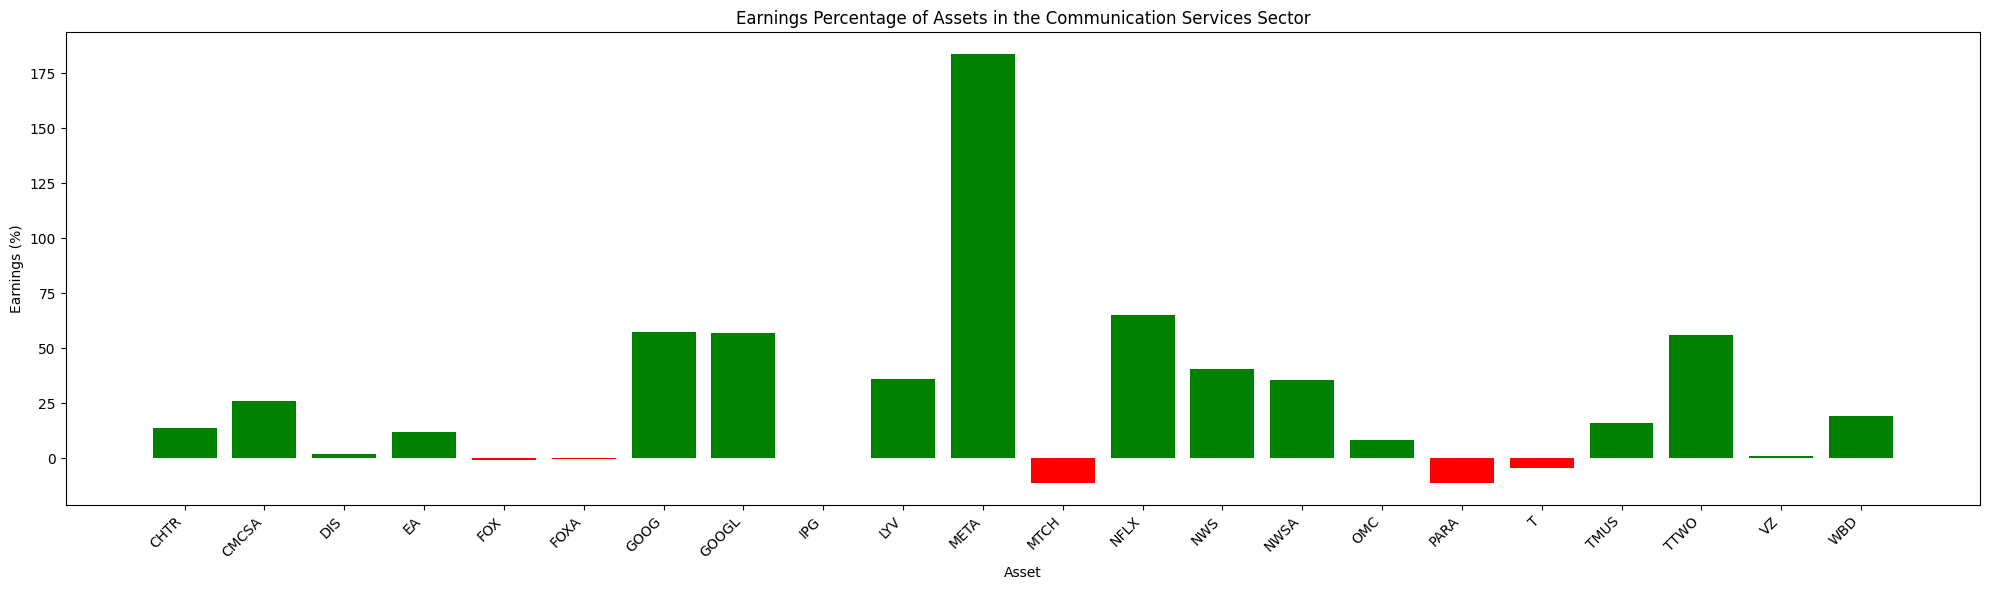

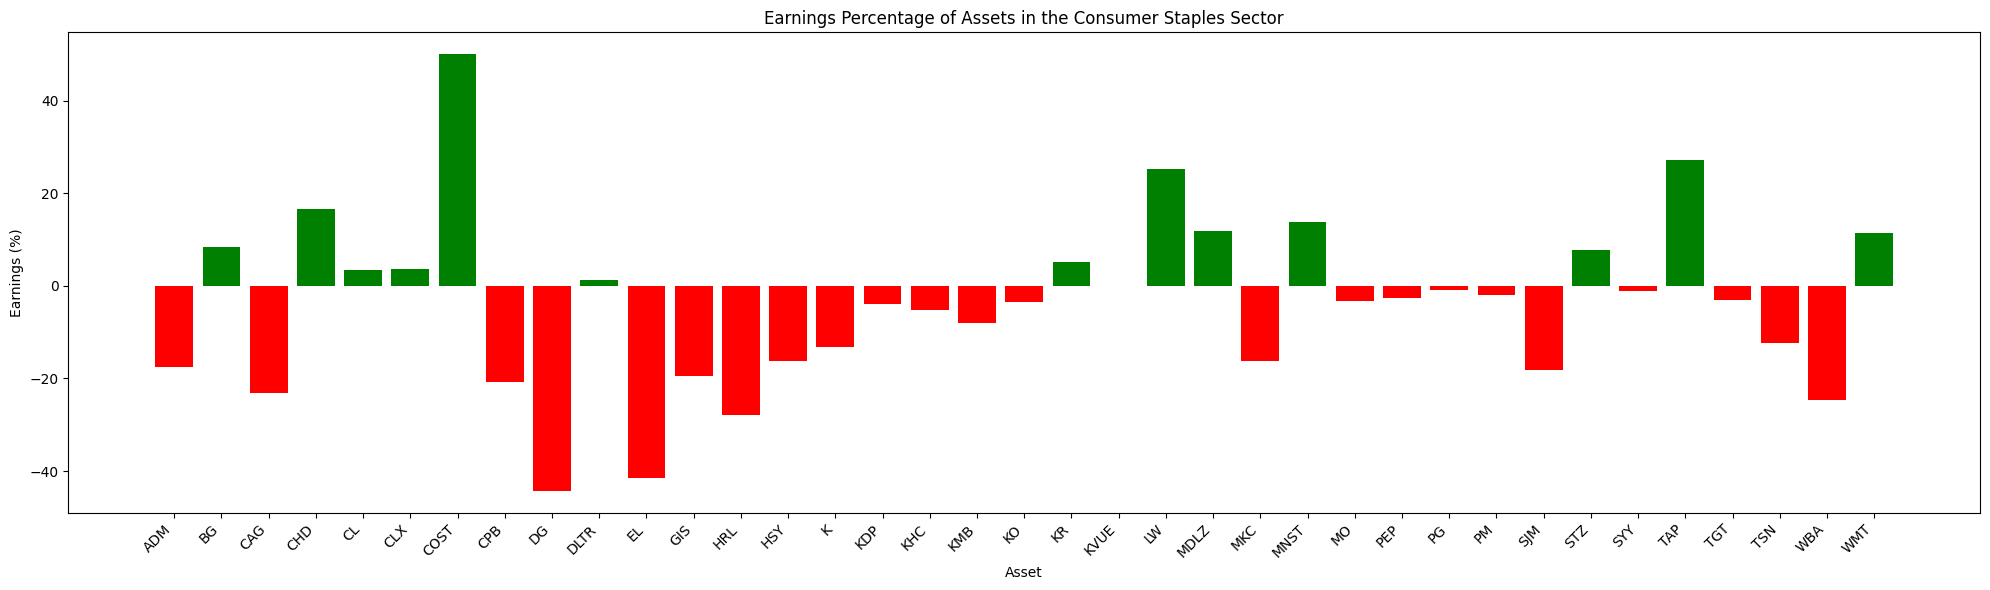

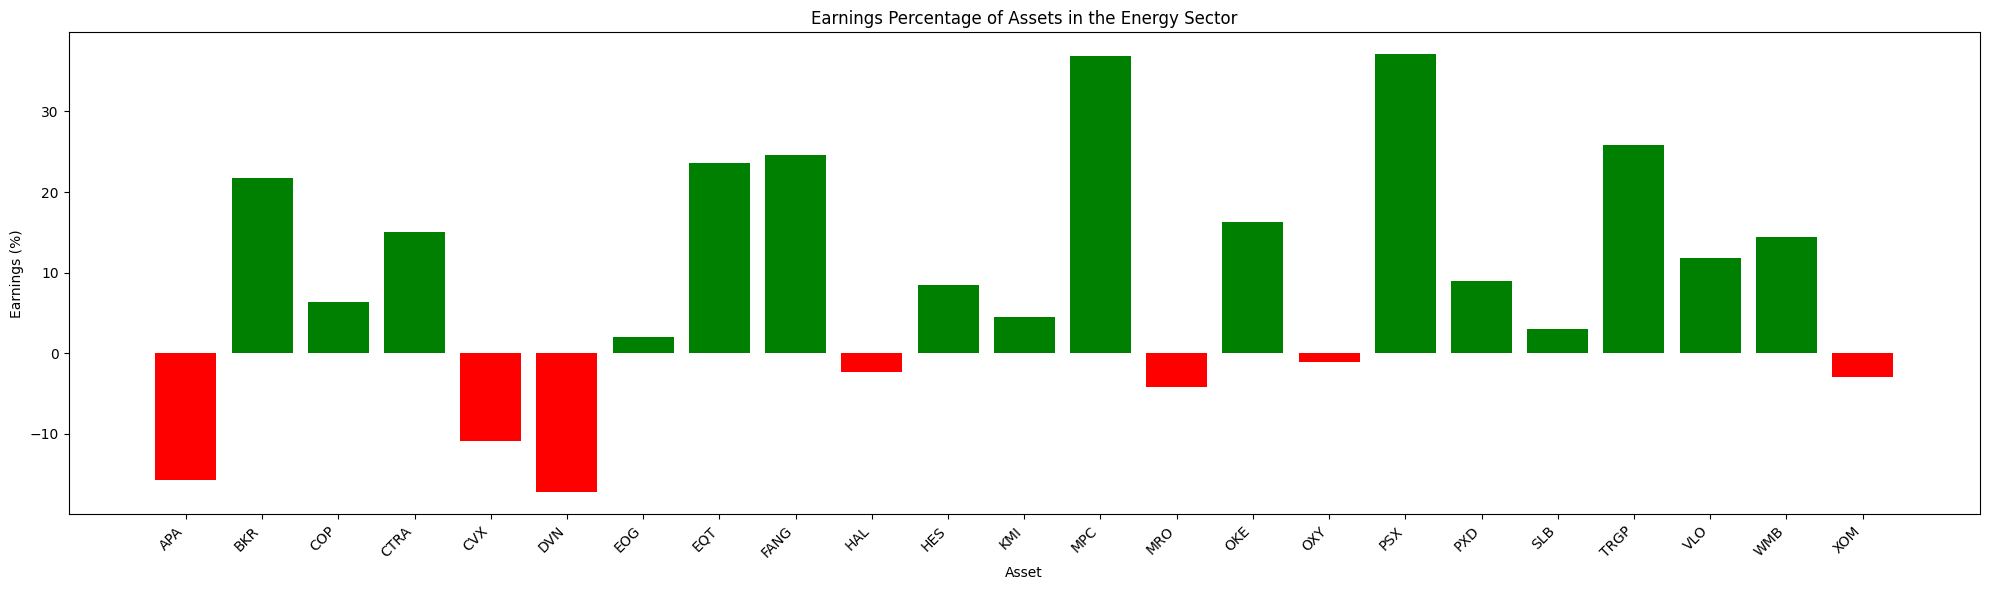

In [12]:
for sector in sector_df['Sector'].unique():
    earnings_df_sector = earnings_df[earnings_df['Sector'] == sector]

    plt.figure(figsize=(20, 6))
    plt.bar(earnings_df_sector['Asset'], earnings_df_sector['Earnings %'], color=['red' if earning < 0 else 'green' for earning in earnings_df_sector['Earnings %']])
    plt.xlabel('Asset')
    plt.ylabel('Earnings (%)')
    plt.title(f'Earnings Percentage of Assets in the {sector} Sector')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

In [13]:
for sector in sector_df['Sector'].unique():
    earnings_df_sector = earnings_df[earnings_df['Sector'] == sector]

    plt.figure(figsize=(20, 6))
    bars = plt.bar(earnings_df_sector['Security'], earnings_df_sector['Earnings %'], color=['red' if earning < 0 else 'green' for earning in earnings_df_sector['Earnings %']])
    plt.xlabel('Asset')
    plt.ylabel('Earnings (%)')
    plt.title(f'Earnings Percentage of Assets in the {sector} Sector')
    plt.xticks(rotation=45, ha='right')

    # Adding hover labels for security names
    for bar, security in zip(bars, earnings_df_sector['Asset']):
        height = bar.get_height()
        plt.annotate(security, xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=90)

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Earnings is -15.712172051528867


count    250.000000
mean      37.780237
std        3.806247
min       30.893446
25%       34.436363
50%       37.473009
75%       41.193135
max       44.691177
Name: APA, dtype: float64

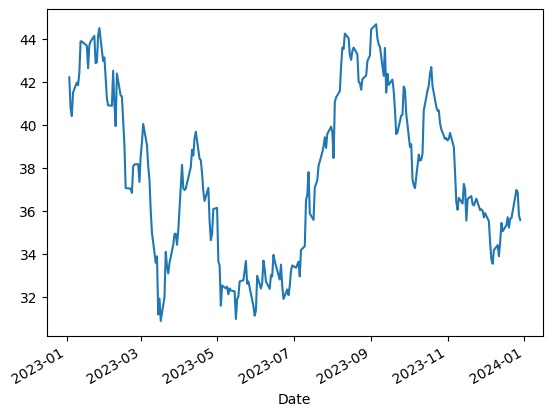

In [26]:
asset='APA'
df_prices[asset].plot()
earning=earnings_df_sector.loc[earnings_df_sector['Asset'] == asset, 'Earnings %'].iloc[0]
print('Earnings is',earning)
df_prices[asset].describe()

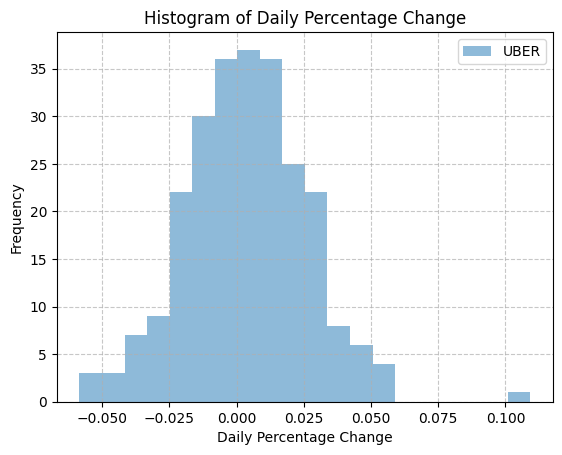

In [15]:
df = np.log(df_prices[asset]).diff()
df = df.dropna()
plt.hist(df, bins=20, alpha=0.5, label=asset)
plt.title('Histogram of Daily Percentage Change')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()